In [501]:
import os
import pandas as pd

df= pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.rain_1h.rename('rain')
df2 = df.rename(index=str, columns={"rain_1h":"Rain", "snow_1h":"Snow"})
def kelv_to_fahr(temp_kelv):
    temp_fahr = ((temp_kelv - 273.15) * (9/5)) + 32
    return temp_fahr

df2["temp"] = kelv_to_fahr(df2["temp"])

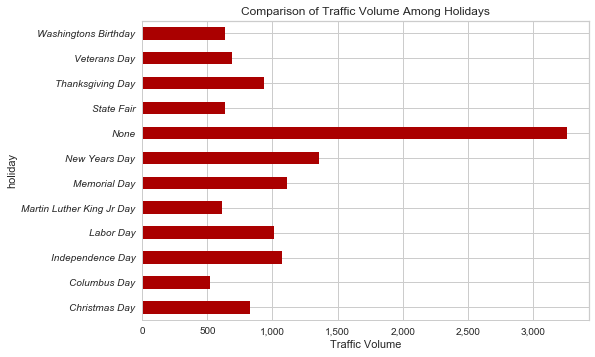

In [502]:
import pandas as pd
import matplotlib.pyplot as plt
%store -r holiday_data

ax = holiday_data.plot(kind='barh',facecolor='#AA0000')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)
ax.yaxis.set_ticklabels(['Christmas Day', 'Columbus Day','Independence Day','Labor Day','Martin Luther King Jr Day', 'Memorial Day', 'New Years Day', 'None', 'State Fair', 'Thanksgiving Day', 'Veterans Day', 'Washingtons Birthday'], fontstyle='italic')#={'weight':'bold'}
plt.xlabel('Traffic Volume')
plt.title('Comparison of Traffic Volume Among Holidays')
plt.show()

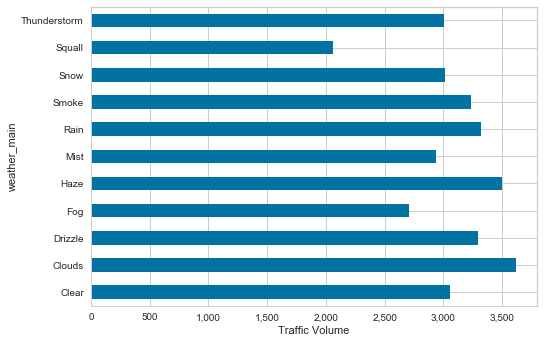

In [504]:
%store -r Weather_Data

ax = Weather_Data.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
plt.xlabel('Traffic Volume')
plt.show()

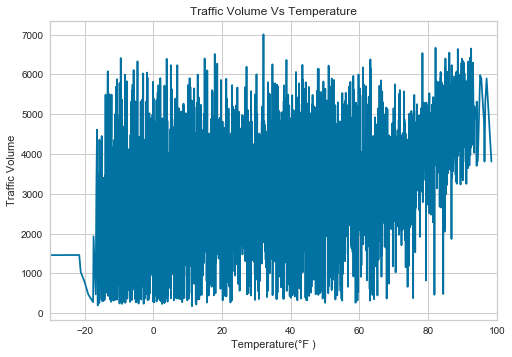

In [522]:
dfz= df2.set_index('temp').groupby('temp').mean()
dfzz= dfz.traffic_volume
dfzz.plot()
plt.xlim(-30, 100)
plt.xlabel('Temperature(°F )')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Vs Temperature')
plt.show()

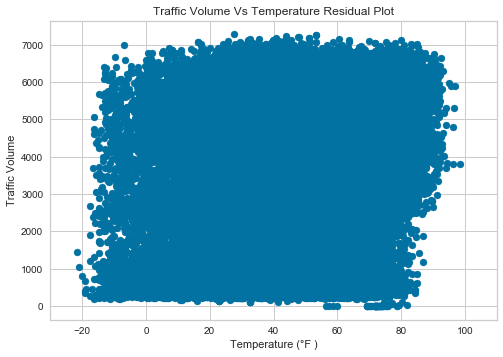

In [505]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


x = df2.temp.values.reshape(-1, 1)
y = df2.traffic_volume.values.reshape(-1, 1)

model= LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')

plt.xlim(-30, 110)
plt.xlabel('Temperature (°F )')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Vs Temperature Residual Plot')


plt.show()



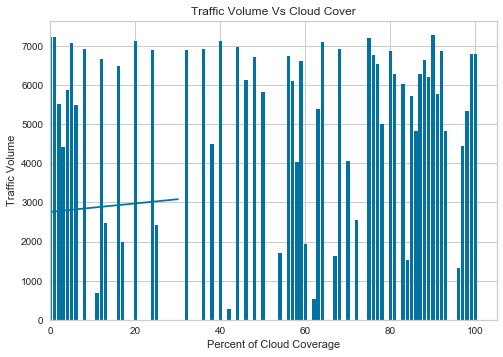

In [506]:
model= LinearRegression()
model.fit(x, y)


x = df2.clouds_all.values
y = df2.traffic_volume

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])


# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')

plt.xlim(0, 105)
plt.xlabel('Percent of Cloud Coverage')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Vs Cloud Cover')

plt.show()



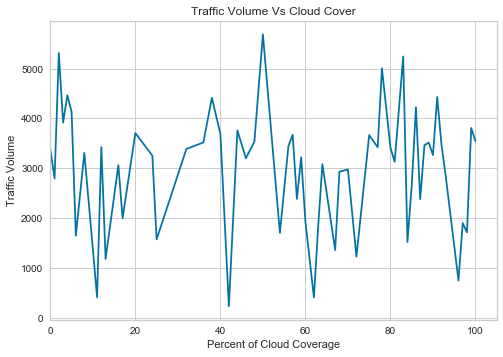

In [517]:
dfa= df2.set_index('clouds_all').groupby('clouds_all').mean()
dfb= dfa.traffic_volume
dfb.plot()
plt.xlim(0, 105)
plt.xlabel('Percent of Cloud Coverage')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Vs Cloud Cover')
plt.show()

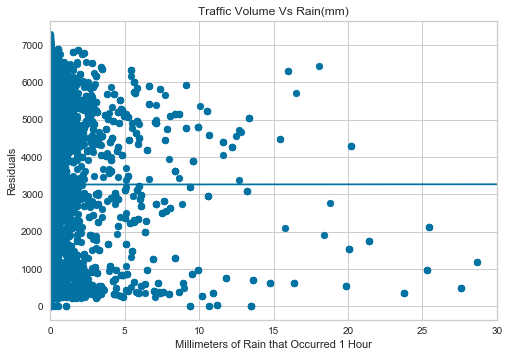

In [365]:
model= LinearRegression()

x = df2.Rain.values.reshape(-1, 1)
y = df2.traffic_volume.values.reshape(-1, 1)

model.fit(x, y)


# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])


# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')

plt.xlim(0, 30)
plt.xlabel('Millimeters of Rain that Occurred 1 Hour')
plt.ylabel('Residuals')
plt.title('Traffic Volume Vs Rain(mm)')

plt.show()

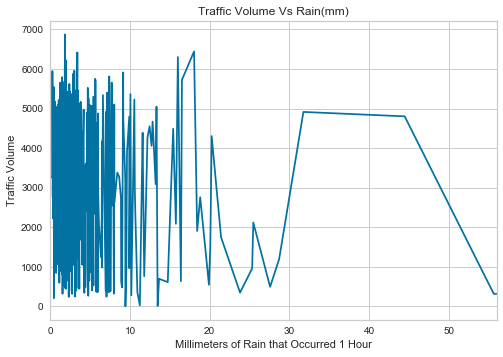

In [523]:
%store -r Rain_Data
Rain_Data.plot()
plt.xlim(0, 56)
plt.xlabel('Millimeters of Rain that Occurred 1 Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Vs Rain(mm)')
plt.show()

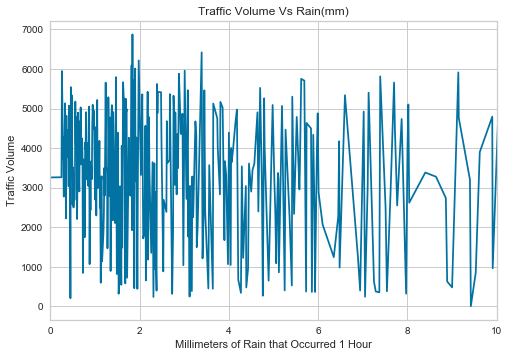

In [524]:
%store -r Rain_Data
Rain_Data.plot()
plt.xlim(0, 10)
plt.xlabel('Millimeters of Rain that Occurred 1 Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Vs Rain(mm)')
plt.show()

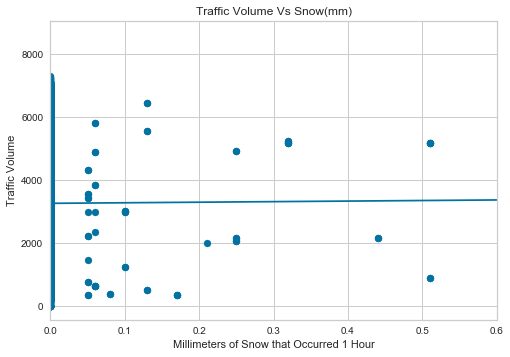

In [252]:
model= LinearRegression()

x = df2.Snow.values.reshape(-1, 1)
y = df2.traffic_volume.values.reshape(-1, 1)

model.fit(x, y)


# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])


# plot the results
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')

plt.xlim(0, 0.6)
plt.xlabel('Millimeters of Snow that Occurred 1 Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Vs Snow(mm)')

plt.show()

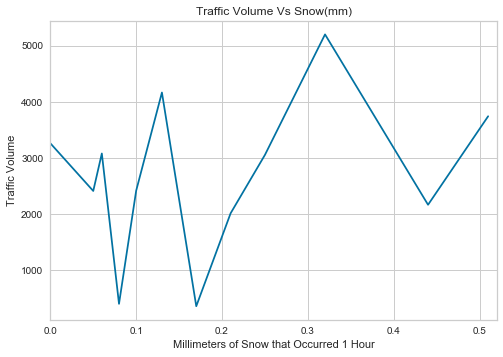

In [382]:
%store -r Snow_Data
Snow_Data.plot()
plt.xlim(0, 0.52)
plt.xlabel('Millimeters of Snow that Occurred 1 Hour')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Vs Snow(mm)')
plt.show()

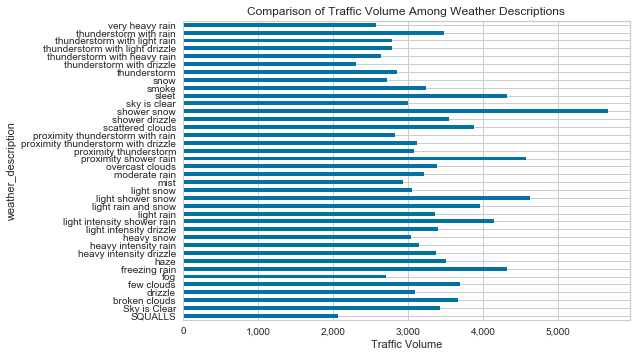

In [533]:
%store -r Weather_Description_Data
plt.title('Comparison of Traffic Volume Among Weather Descriptions')
plt.xlabel('Traffic Volume')
ax = Weather_Description_Data.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.patch.set_facecolor('#FFFFFF')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['left'].set_linewidth(1)
ax.yaxis.set_ticklabels(Weather_Description_Data.index)

plt.show()

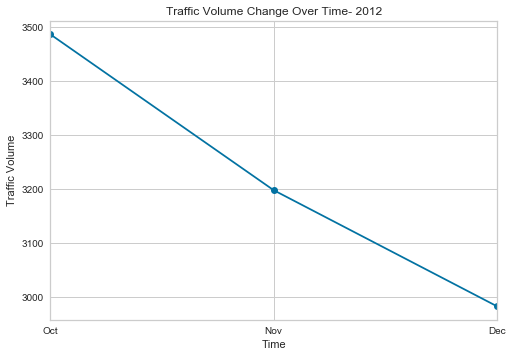

In [534]:
%store -r Month_Data
ax=Month_Data[2012].plot(marker='o')
plt.ylabel('Traffic Volume')
plt.xlabel('Time')
plt.title('Traffic Volume Change Over Time- 2012')
ax.xaxis.set_ticks(np.arange(10, 13, 1))
ax.xaxis.set_ticklabels(['Oct','Nov','Dec'])
plt.show()


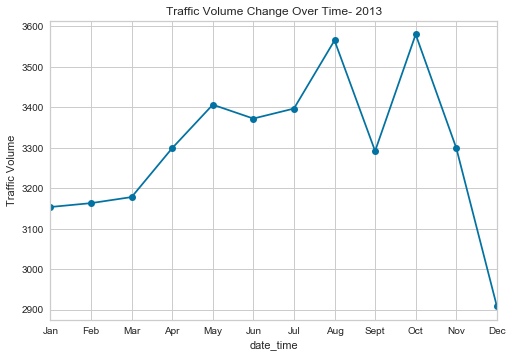

In [535]:
%store -r Month_Data
ax= Month_Data[2013].plot(marker='o')
plt.ylabel('Traffic Volume')
plt.xlim([1,12])
ax.xaxis.set_ticks(np.arange(1, 13, 1))
ax.xaxis.set_ticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.title('Traffic Volume Change Over Time- 2013')
plt.xlim([1,12])
plt.show()


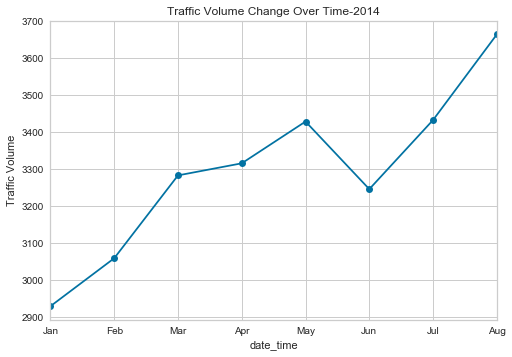

In [536]:
%store -r Month_Data
ax=Month_Data[2014].plot(marker='o')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Change Over Time-2014')
plt.xlim([1,8])
ax.xaxis.set_ticks(np.arange(1, 9, 1))
ax.xaxis.set_ticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()


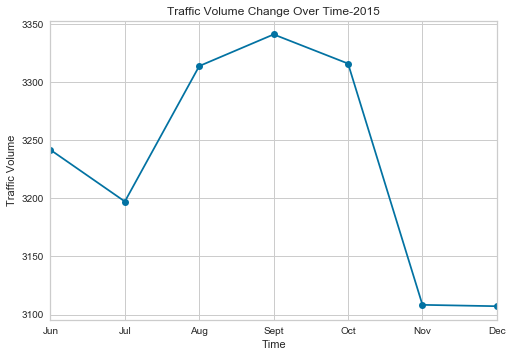

In [537]:
%store -r Month_Data
ax= Month_Data[2015].plot(marker='o')
plt.ylabel('Traffic Volume')
plt.xlabel('Time')
plt.title('Traffic Volume Change Over Time-2015')
plt.xlim([6,12])
ax.xaxis.set_ticklabels(['Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()

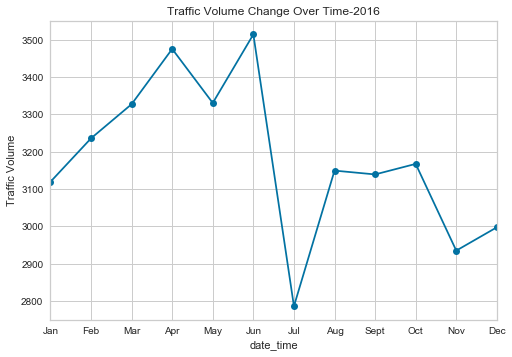

In [538]:
%store -r Month_Data
ax= Month_Data[2016].plot(marker='o')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Change Over Time-2016')
plt.xlim([1,12])
ax.xaxis.set_ticks(np.arange(1, 13, 1))
ax.xaxis.set_ticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()

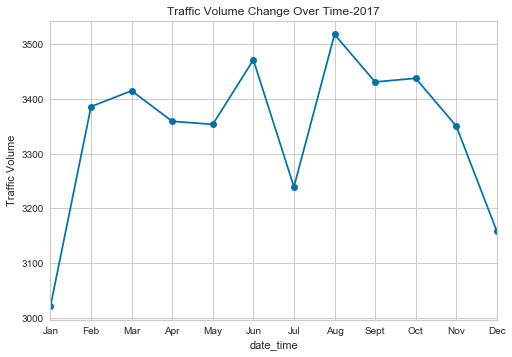

In [539]:
%store -r Month_Data
ax= Month_Data[2017].plot(marker='o')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Change Over Time-2017')
plt.xlim([1,12])
ax.xaxis.set_ticks(np.arange(1, 13, 1))
ax.xaxis.set_ticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.show()

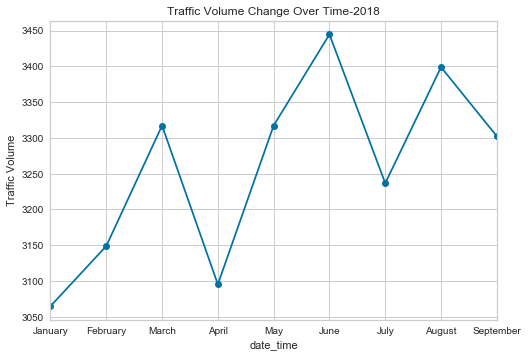

In [540]:
%store -r Month_Data
ax= Month_Data[2018].plot(marker='o')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Change Over Time-2018')
ax.xaxis.set_ticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlim([1,9])
plt.show()

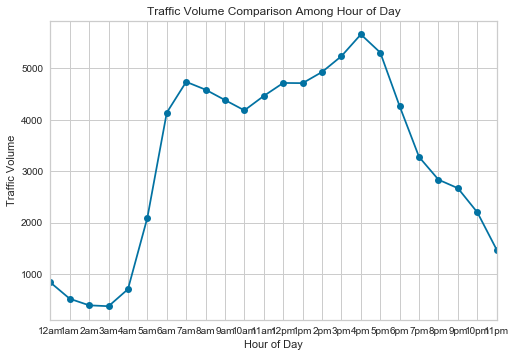

In [472]:
%store -r Hour_Data
ax= Hour_Data.plot(marker='o')
plt.ylabel('Traffic Volume')
plt.xlabel('Hour of Day')
plt.title('Traffic Volume Comparison Among Hour of Day')
ax.xaxis.set_ticks(np.arange(0, 24, 1))
ax.xaxis.set_ticklabels(['12am', '1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm'])
plt.show()